In [12]:
# Part 1

def acc_rej_plt(n_samples=10000):
    from matplotlib import pyplot as plt
    import numpy as np
    from Notes import calculus_in_python as notes

    def target_FUN(x):
        if 0 < x < 1:
            return (np.exp(x ** 2) - 1) / (np.exp(1) - 1)
        elif x <= 0:
            return 0
        else:
            return 1

    def target_fun(x):
        return notes.df(target_FUN, x)

    def proposed_fun(x):
        return notes.get_normalized_function(lambda z: 4 * z)(x)

    def reject_sampler(n_samples):

        accepted_samples = []

        target = lambda x: target_fun(x)
        proposal = lambda x: proposed_fun(x)
        # Calculate M
        x = np.linspace(0, 1, n_samples)
        y_target = [target_fun(val) for val in x]
        y_proposal = [proposed_fun(val) for val in x]
        M = round(max(y_target[i] / y_proposal[i] for i in range(len(x)) if y_proposal[i] > 0))  #round
        print("M:", M)

        while len(accepted_samples) < n_samples:
            x = np.log(np.random.uniform(0, 1) * (np.exp(1) - 1) + 1)  # np.random.uniform(0, 1)
            u = np.random.uniform(0, 1)

            if u <= target(x) / (M * proposal(x)):
                accepted_samples.append(x)  # Accept x

        return np.array(accepted_samples)

    samples = reject_sampler(n_samples)

    # Plot histogram of samples
    plt.hist(samples, bins=100, density=True, alpha=0.6, color='skyblue', edgecolor='black',
             label='Samples Histogram')

    # Plot the true density function
    x = np.linspace(0, 1, n_samples)  # Generate points in the range [0, 1]
    y = [target_fun(val) for val in x]
    plt.plot(x, y, color='red', label='True Density', linewidth=2)

    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.title('Histogram of Samples with True Density')
    plt.legend()
    plt.show()

    return samples

M: 2


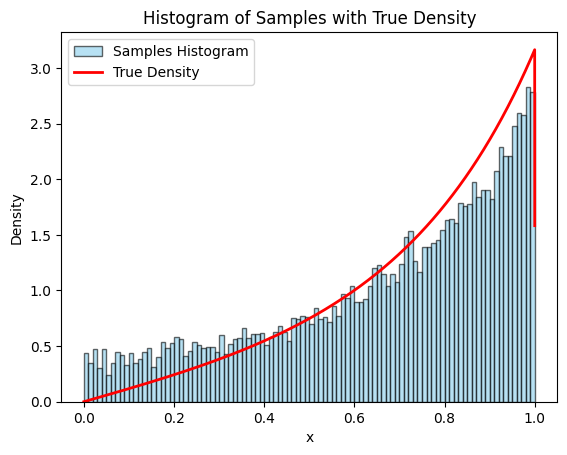

array([0.04241943, 0.89487124, 0.8435082 , ..., 0.71869057, 0.71657886,
       0.88874078])

In [13]:
acc_rej_plt()

In [14]:
import sympy as sp

# Define the symbolic variables
lambda_ = sp.symbols('lambda')
n = sp.symbols('n')  # Define n as a symbol for the number of data points
x_data = sp.symbols('x1:6')  # Create symbolic variables for data points x1, x2, ..., xn

# Define the log-likelihood function symbolically
log_likelihood = -n * sp.log(24) + 5 * n * sp.log(lambda_) + 4 * sum(sp.log(x) for x in x_data) - lambda_ * sum(x_data)

# Simplify the log-likelihood expression
simplified_log_likelihood = sp.simplify(log_likelihood)
print("Simplified log-likelihood function:")
sp.pprint(simplified_log_likelihood)

# Take the derivative of the log-likelihood with respect to lambda
d_log_likelihood = sp.diff(simplified_log_likelihood, lambda_)

# Simplify the derivative expression
simplified_derivative = sp.simplify(d_log_likelihood)
print("\nSimplified derivative of log-likelihood:")
sp.pprint(simplified_derivative)

# Solve for lambda by setting the derivative equal to 0
mle_lambda = sp.solve(simplified_derivative, lambda_)
print("\nSimplified MLE for lambda:")
sp.pprint(mle_lambda)

Simplified log-likelihood function:
-λ⋅(x₁ + x₂ + x₃ + x₄ + x₅) + 5⋅n⋅log(λ) - n⋅log(24) + 4⋅log(x₁) + 4⋅log(x₂) + ↪

↪  4⋅log(x₃) + 4⋅log(x₄) + 4⋅log(x₅)

Simplified derivative of log-likelihood:
                          5⋅n
-x₁ - x₂ - x₃ - x₄ - x₅ + ───
                           λ 

Simplified MLE for lambda:
⎡         5⋅n          ⎤
⎢──────────────────────⎥
⎣x₁ + x₂ + x₃ + x₄ + x₅⎦


In [15]:
import sympy as sp

def maximize_log_likelihood(log_likelihood_expr, parameter, data_points):
    """
    Generalizes the process of computing MLE for a given log-likelihood expression.

    Args:
        log_likelihood_expr (sympy expression): The symbolic log-likelihood function.
        parameter (sympy symbol): The parameter to be estimated (e.g., lambda).
        data_points (list of sympy symbols): The list of data points in the log-likelihood expression.

    Returns:
        tuple: Simplified log-likelihood, its derivative, and the MLE for the parameter.
    """
    # Simplify the log-likelihood expression
    simplified_log_likelihood = sp.simplify(log_likelihood_expr)

    # Take the derivative of the log-likelihood with respect to the parameter
    d_log_likelihood = sp.diff(simplified_log_likelihood, parameter)

    # Solve for the parameter by setting the derivative equal to 0
    mle_parameter = sp.solve(d_log_likelihood, parameter)

    return simplified_log_likelihood, d_log_likelihood, mle_parameter

# Example Usage

# Define the symbolic variables
lambda_ = sp.symbols('lambda')
n = sp.symbols('n')  # Number of data points
x_data = sp.symbols('x1:6')  # Data points x1, x2, ..., xn

# Define the log-likelihood expression
log_likelihood = -n * sp.log(24) + 5 * n * sp.log(lambda_) + 4 * sum(sp.log(x) for x in x_data) - lambda_ * sum(x_data)

# Call the function
simplified_log_likelihood, simplified_derivative, mle_lambda = maximize_log_likelihood(log_likelihood, lambda_, x_data)

# Output results
print("Simplified log-likelihood function:")
sp.pprint(simplified_log_likelihood)

print("\nSimplified derivative of log-likelihood:")
sp.pprint(simplified_derivative)

print("\nSimplified MLE for lambda:")
sp.pprint(mle_lambda)

Simplified log-likelihood function:
-λ⋅(x₁ + x₂ + x₃ + x₄ + x₅) + 5⋅n⋅log(λ) - n⋅log(24) + 4⋅log(x₁) + 4⋅log(x₂) + ↪

↪  4⋅log(x₃) + 4⋅log(x₄) + 4⋅log(x₅)

Simplified derivative of log-likelihood:
                          5⋅n
-x₁ - x₂ - x₃ - x₄ - x₅ + ───
                           λ 

Simplified MLE for lambda:
⎡         5⋅n          ⎤
⎢──────────────────────⎥
⎣x₁ + x₂ + x₃ + x₄ + x₅⎦
